<a href="https://colab.research.google.com/github/Hydenx2004/EX-AI-practice/blob/main/Experiment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install shap

In [32]:
import shap
import pandas as pd
from sklearn.linear_model import LinearRegression

In [33]:
df = pd.read_csv('diabetes.csv')

In [34]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [35]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [36]:
explainer = shap.LinearExplainer(model, X)
shap_values = explainer.shap_values(X)

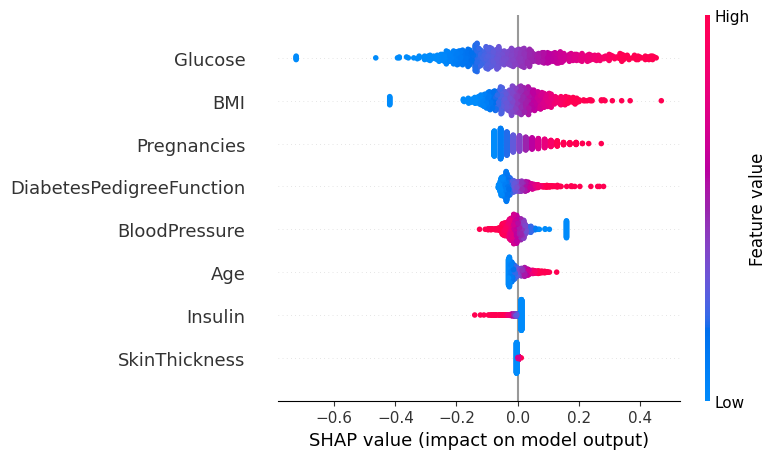

In [37]:
shap.summary_plot(shap_values, X)

In [72]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import mnist

In [80]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [81]:
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [82]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [83]:
model2.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8299 - loss: 0.6210
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9488 - loss: 0.1831
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9629 - loss: 0.1313


In [84]:
background = x_train[0:100]

In [85]:
explainer = shap.DeepExplainer(model2, background)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_24
Received: inputs=['Tensor(shape=(100, 28, 28))']
  warnings.warn(msg)


In [86]:
shap_values = explainer.shap_values(x_test[:2])

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_24
Received: inputs=['Tensor(shape=(200, 28, 28))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_24
Received: inputs=['Tensor(shape=(2, 28, 28))']
  warnings.warn(msg)


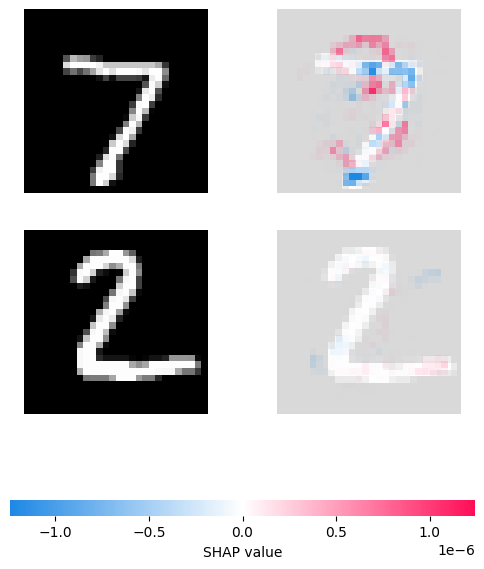

In [87]:
shap.image_plot(shap_values, x_test[:2])

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X,y)

RandomForestRegressor()

In [94]:
explainer=shap.KernelExplainer(model.predict,X)

In [95]:
shap_values=explainer.shap_values(X[:5])

  0%|          | 0/5 [00:00<?, ?it/s]

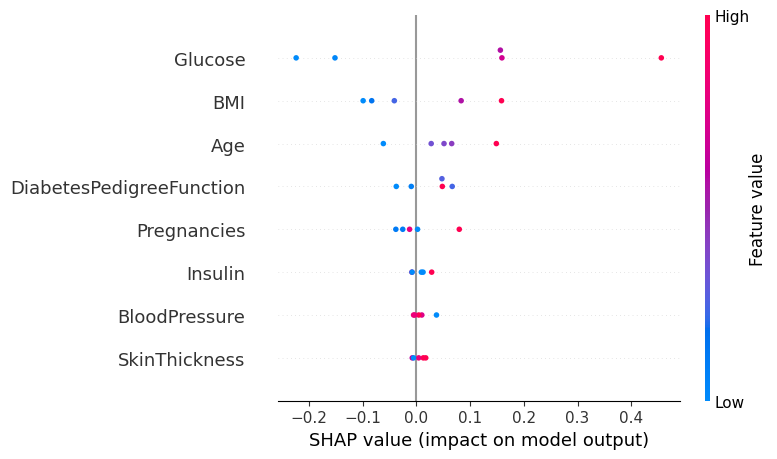

In [97]:
shap.summary_plot(shap_values,X[:5])